In [2]:
import glob
import numpy as np
import pandas as pd
import re
import os
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

csv_data ='/content/drive/MyDrive/Colab Notebooks/winrate/Final_level_data/all_lvls_4train.csv'
all_lvls_df = pd.read_csv(csv_data, index_col=0)

all_lvls_df.head()

,r_weights,b_weights,g_weights,y_weights,moves,target.yellow.goal_0,v_weights,target.blue.goal_0,target.green.goal_0,target.red.goal_0,o_weights,target.orange.goal_0,w_weights,target.drop1.goal_0,c_weights,h_weights,target.flower.goal_0,p_weights,target.smoke.goal_0,z_weights,t_weights,target.tire.goal_0,frogs,bugs,winkies,target.munchkins.goal_0,target.tire.goal _0,x_weights,target.colorizer.goal_0,target.colorizeb.goal_0,target.colorizev.goal_0,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,e_weights,target.energy.goal_0,l_weights,target.munchkinegg.goal_0,target.bouquet.goal_0,winrate
level,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,25,25,25,25,10,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93.15
2,24,30,23,23,10,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94.18
3,20,20,20,40,10,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.67
4,18,18,30,17,10,0,17,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95.32
5,18,18,18,28,10,21,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96.84


In [5]:
all_lvls_df.shape

(5854, 40)

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [7]:

# Define features and target variable
X = all_lvls_df.drop(columns=['winrate'])  # Replace 'winrate' with your target column name
y = all_lvls_df['winrate']

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [31]:

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# # Predict winrate for new data
# new_data = pd.DataFrame({  # Replace with actual feature values
#     'feature1': [value1],
#     'feature2': [value2],
#     # Add all other features here
# })
# predicted_winrate = model.predict(new_data)
# print(f"Predicted Winrate: {predicted_winrate}")


Mean Squared Error: 144.00157506711787
R^2 Score: 0.09773119850141176


In [33]:
X_test['predicted_winrate'] = y_pred

In [34]:
pred_df = pd.DataFrame()

pred_df['level'] = X_test.index
pred_df['winrate'] = y_test
pred_df['predicted_winrate'] = y_pred

pred_df.dropna(axis=0, inplace=True)

pred_df.set_index('level', inplace=True)

pred_df =pred_df.sort_values(by='level')

pred_df.head(50)

,winrate,predicted_winrate
level,,
18,18.62,62.774900
105,15.58,28.663800
402,53.90,22.758933
829,18.23,17.933400
881,10.67,13.915200
890,17.02,19.790764
909,62.02,15.738020
994,23.53,15.531329
1156,11.37,28.249700


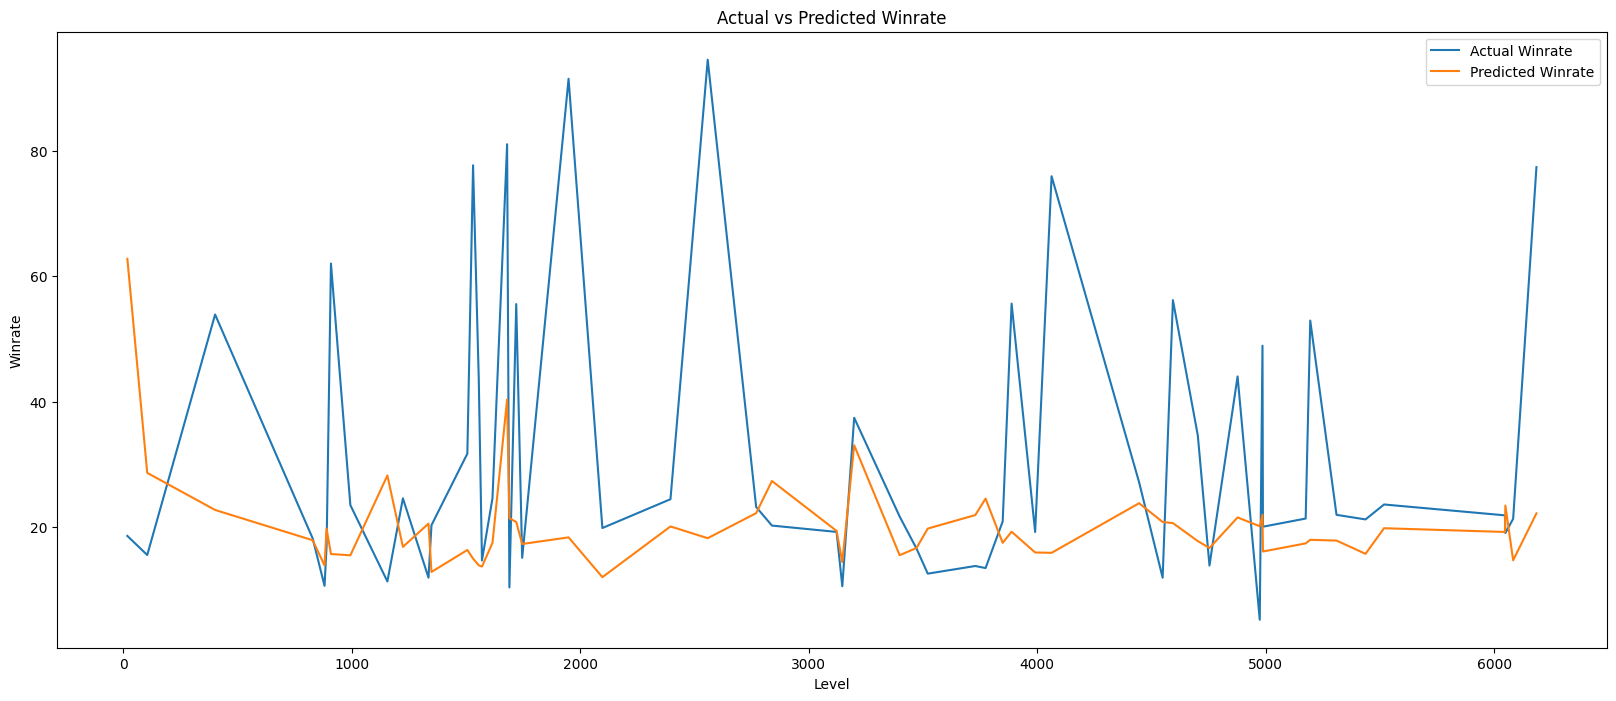

In [40]:


plt.figure(figsize=(20, 8))  # Set the figure size to 10x10 inches
plt.plot(pred_df.index, pred_df['winrate'], label='Actual Winrate')
plt.plot(pred_df.index, pred_df['predicted_winrate'], label='Predicted Winrate')
plt.xlabel('Level')
plt.ylabel('Winrate')
plt.title('Actual vs Predicted Winrate')
plt.legend()
plt.show()

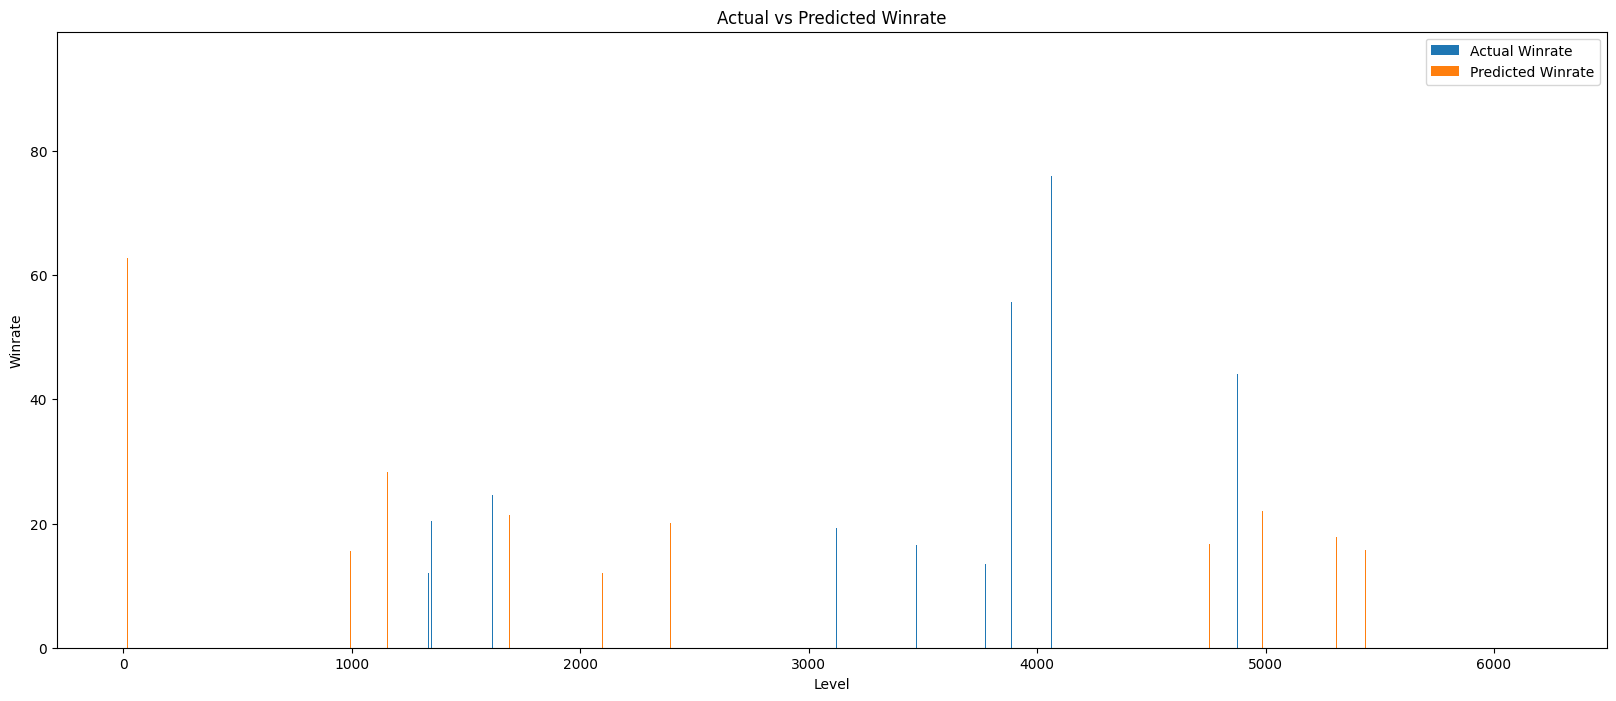

In [38]:
# prompt: plot bar chart:plt.figure(figsize=(20, 8))  # Set the figure size to 10x10 inches
# plt.bar(pred_df.index, pred_df[['winrate','predicted_winrate']], label='Actual Winrate')
# # plt.bar(pred_df.index, pred_df['predicted_winrate'], label='Predicted Winrate')
# plt.xlabel('Level')
# plt.ylabel('Winrate')
# plt.title('Actual vs Predicted Winrate')
# plt.legend()
# plt.show()

plt.figure(figsize=(20, 8))  # Set the figure size to 10x10 inches

# Plot 'winrate' and 'predicted_winrate' as separate bars for each level
plt.bar(pred_df.index, pred_df['winrate'], label='Actual Winrate', width=0.4, align='center')
plt.bar(pred_df.index + 0.4, pred_df['predicted_winrate'], label='Predicted Winrate', width=0.4, align='center')

plt.xlabel('Level')
plt.ylabel('Winrate')
plt.title('Actual vs Predicted Winrate')
plt.legend()
plt.show()